In [1]:
#import warnings
#warnings.filter_warning('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
pd.set_option('display.max_rows', 200)

In [4]:
df_churn = pd.read_csv('telecom_churn_data.csv')
df_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
df_churn.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               99999 non-null int64
circle_id                   99999 non-null int64
loc_og_t2o_mou              98981 non-null float64
std_og_t2o_mou              98981 non-null float64
loc_ic_t2o_mou              98981 non-null float64
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
onnet_mou_7                 96140 non-null float64
onnet_mou_8                 94621 non-null float64
onnet_mou_9                 92254 non-null float64
offnet_mou_6                960

In [6]:
cols_to_category = ['circle_id', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_7', 'night_pck_user_8',
                   'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']

for col in cols_to_category:
    df_churn[col] = df_churn[col].astype('category')


## Data Cleaning


In [7]:
def calc_null_per():
    null_per = 100 * df_churn.isnull().sum() / df_churn.shape[0]
    above_zero = null_per[null_per > 0]
    return above_zero

In [8]:
calc_null_per()

loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_7                3.859039
roam_og_mou_8                5.378054
roam_og_mou_9                7.745077
loc_og_t2t_mou_6             3.937039
loc_og_t2t_mou_7             3.859039
loc_og_t2t_mou_8             5.378054
loc_og_t2t_mou_9             7.745077
loc_og_t2m_m

### Imputation

In [9]:
cols_to_impute_zero = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 
                       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 
                       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 
                       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 
                       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 
                       'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 
                       'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 
                       'night_pck_user_8', 'night_pck_user_9']

for col in cols_to_impute_zero:
    df_churn[col].fillna(0, inplace=True)

In [10]:
calc_null_per()

loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_7                3.859039
roam_og_mou_8                5.378054
roam_og_mou_9                7.745077
loc_og_t2t_mou_6             3.937039
loc_og_t2t_mou_7             3.859039
loc_og_t2t_mou_8             5.378054
loc_og_t2t_mou_9             7.745077
loc_og_t2m_m

#### Drop high null percentage columns

In [11]:
df_churn = df_churn.drop(
    ['fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 
     'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
             axis = 1)

#### Drop irreleant columns

In [12]:
df_churn = df_churn.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9',
                         'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'],
             axis = 1)

In [13]:
null_cols = calc_null_per() 
null_cols

loc_og_t2o_mou         1.018010
std_og_t2o_mou         1.018010
loc_ic_t2o_mou         1.018010
onnet_mou_6            3.937039
onnet_mou_7            3.859039
onnet_mou_8            5.378054
onnet_mou_9            7.745077
offnet_mou_6           3.937039
offnet_mou_7           3.859039
offnet_mou_8           5.378054
offnet_mou_9           7.745077
roam_ic_mou_6          3.937039
roam_ic_mou_7          3.859039
roam_ic_mou_8          5.378054
roam_ic_mou_9          7.745077
roam_og_mou_6          3.937039
roam_og_mou_7          3.859039
roam_og_mou_8          5.378054
roam_og_mou_9          7.745077
loc_og_t2t_mou_6       3.937039
loc_og_t2t_mou_7       3.859039
loc_og_t2t_mou_8       5.378054
loc_og_t2t_mou_9       7.745077
loc_og_t2m_mou_6       3.937039
loc_og_t2m_mou_7       3.859039
loc_og_t2m_mou_8       5.378054
loc_og_t2m_mou_9       7.745077
loc_og_t2f_mou_6       3.937039
loc_og_t2f_mou_7       3.859039
loc_og_t2f_mou_8       5.378054
loc_og_t2f_mou_9       7.745077
loc_og_t

In [14]:
def impute_based_on_zero_per(col):
    zero_per = round(100 * (df_churn[col] == 0).sum() / df_churn.shape[0], 2)
    if zero_per > 95:
        df_churn.drop(col, axis=1, inplace=True)
        return
    if zero_per > 50:
        df_churn[col].fillna(0, inplace=True)
        return
    df_churn[col].fillna(df_churn[col].median(), inplace=True)

In [15]:
for col in null_cols.index:
    if df_churn[col].dtype == 'O':
        df_churn[col].fillna(df_churn[col].mode()[0], inplace=True)
    else:
        impute_based_on_zero_per(col)

In [16]:
calc_null_per()

Series([], dtype: float64)

## Filter High Value Customer

In [17]:
## Calc Average 

In [18]:
df_churn["total_rech_amt_6_7"] = (df_churn["total_rech_amt_6"] + df_churn["total_rech_amt_7"])/2

In [19]:
df_churn["total_rech_amt_6_7"].head(10)

0     307.0
1     229.0
2     241.5
3     270.0
4     273.0
5      60.0
6     360.5
7    1185.0
8     519.0
9     207.5
Name: total_rech_amt_6_7, dtype: float64

In [20]:
df_churn_hvc = df_churn[df_churn['total_rech_amt_6_7'] > df_churn['total_rech_amt_6_7'].quantile(0.7)]

In [21]:
df_churn_hvc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Columns: 204 entries, mobile_number to total_rech_amt_6_7
dtypes: category(5), float64(164), int64(34), object(1)
memory usage: 45.9+ MB


## Driving Target Column

In [22]:
df_churn_hvc['total_call_usage'] = df_churn_hvc['total_og_mou_9'] + df_churn_hvc['total_ic_mou_9']

C:\Users\manvinder.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df_churn_hvc['total_data_usage'] = df_churn_hvc['vol_2g_mb_9'] + df_churn_hvc['vol_3g_mb_9']

C:\Users\manvinder.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df_churn_hvc.head()

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,...,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_6_7,total_call_usage,total_data_usage
7,7000701601,109,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.84,...,0,0,802,57.74,19.38,18.74,0.0,1185.0,0.00,0.0
8,7001524846,109,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,...,0,0,315,21.03,910.65,122.16,0.0,519.0,177.09,0.0
13,7002191713,109,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,...,0,0,2607,0.00,0.00,0.00,0.0,380.0,1077.95,0.0
16,7000875565,109,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,...,0,0,511,0.00,2.45,21.89,0.0,459.0,590.30,0.0
17,7000187447,109,690.008,18.980,25.499,257.583,1185.91,9.28,7.79,558.51,...,0,0,667,0.00,0.00,0.00,0.0,408.0,718.21,0.0


In [25]:
df_churn_hvc['total_usage'] = df_churn_hvc['total_call_usage'] + df_churn_hvc['total_data_usage']


C:\Users\manvinder.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
df_churn_hvc['total_usage']

7           0.00
8         177.09
13       1077.95
16        590.30
17        718.21
          ...   
99970     651.59
99974     457.12
99986    2592.97
99988     841.39
99997    4265.02
Name: total_usage, Length: 29979, dtype: float64

In [27]:
df_churn_hvc['cust_churn'] = df_churn_hvc.total_usage.map(lambda x: 1 if x == 0 else 0)

C:\Users\manvinder.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df_churn_hvc.head()

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_6_7,total_call_usage,total_data_usage,total_usage,cust_churn
7,7000701601,109,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.84,...,802,57.74,19.38,18.74,0.0,1185.0,0.00,0.0,0.00,1
8,7001524846,109,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,...,315,21.03,910.65,122.16,0.0,519.0,177.09,0.0,177.09,0
13,7002191713,109,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,...,2607,0.00,0.00,0.00,0.0,380.0,1077.95,0.0,1077.95,0
16,7000875565,109,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,...,511,0.00,2.45,21.89,0.0,459.0,590.30,0.0,590.30,0
17,7000187447,109,690.008,18.980,25.499,257.583,1185.91,9.28,7.79,558.51,...,667,0.00,0.00,0.00,0.0,408.0,718.21,0.0,718.21,0


### Drop 9th month data

In [29]:
cols_to_drop = list(filter(lambda x: "_9" in x, df_churn_hvc.columns))
df_churn_hvc = df_churn_hvc.drop(cols_to_drop, axis=1)

In [30]:
cols_to_drop = list(filter(lambda x: "_8" in x, df_churn_hvc.columns))
df_churn_hvc = df_churn_hvc.drop(cols_to_drop, axis=1)

### Drop Highly Skewed Columns

In [31]:
cat_columns = df_churn_hvc.select_dtypes(['object', 'category']).columns
cat_columns

Index(['circle_id', 'night_pck_user_6', 'night_pck_user_7'], dtype='object')

In [32]:
# print value count in each column
for col in cat_columns:
    print(col + ':')
    print(round(100 * df_churn_hvc[col].value_counts(normalize=True), 2))
    print('-------------')

circle_id:
109    100.0
Name: circle_id, dtype: float64
-------------
night_pck_user_6:
0.0    98.96
1.0     1.04
Name: night_pck_user_6, dtype: float64
-------------
night_pck_user_7:
0.0    99.01
1.0     0.99
Name: night_pck_user_7, dtype: float64
-------------


In [33]:
# drop circle_id
df_churn_hvc = df_churn_hvc.drop(['circle_id', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_6'], axis=1)

## Outlier Treatment

In [34]:
shape_df = pd.DataFrame({'skew': df_churn_hvc.skew(), 'kurt': df_churn_hvc.kurt()})
shape_df.head

<bound method NDFrame.head of                          skew         kurt
mobile_number       -0.025704    -1.166016
arpu_6              13.344432   579.532168
arpu_7              19.344429  1151.062480
onnet_mou_6          3.908420    25.758600
onnet_mou_7          4.122414    30.154619
offnet_mou_6         3.480565    21.752558
offnet_mou_7         3.728853    26.240919
roam_ic_mou_6       11.562719   220.004671
roam_ic_mou_7       16.889585   497.892089
roam_og_mou_6        8.970096   129.081456
roam_og_mou_7        8.968175   114.482314
loc_og_t2t_mou_6     9.096263   128.358383
loc_og_t2t_mou_7    10.204818   166.320470
loc_og_t2m_mou_6     4.210632    33.828439
loc_og_t2m_mou_7     3.974360    30.861278
loc_og_t2f_mou_6    16.900925   704.976110
loc_og_t2f_mou_7    15.477118   535.713766
loc_og_t2c_mou_6    17.784396   598.331584
loc_og_t2c_mou_7    25.213176  1076.167488
loc_og_mou_6         4.399239    43.632881
loc_og_mou_7         4.374074    37.982165
std_og_t2t_mou_6     4.3

In [35]:
shape_df[(shape_df['skew'].abs() > 15 ) & (shape_df['kurt'].abs() > 100)]

,skew,kurt
arpu_7,19.344429,1151.062480
roam_ic_mou_7,16.889585,497.892089
loc_og_t2f_mou_6,16.900925,704.976110
loc_og_t2f_mou_7,15.477118,535.713766
loc_og_t2c_mou_6,17.784396,598.331584
loc_og_t2c_mou_7,25.213176,1076.167488
std_og_t2f_mou_6,16.516813,439.852629
std_og_t2f_mou_7,17.102508,423.375150
isd_og_mou_6,86.867937,9981.548953
isd_og_mou_7,83.469192,8838.347896


In [36]:
outlier_df = shape_df[(shape_df['skew'].abs() > 15 ) & (shape_df['kurt'].abs() > 100)]
for col in outlier_df.index:
    skew = shape_df.loc[col]['skew']
    if skew > 0:
        val = df_churn_hvc[col].quantile(0.999)
        df_churn_hvc[col] = np.where(df_churn_hvc[col] > val, val ,df_churn_hvc[col])
    else:
        val = df_churn_hvc[col].quantile(0.001)
        df_churn_hvc[col] = np.where(df_churn_hvc[col] < val, val ,df_churn_hvc[col])

## EDA

In [37]:
df_churn_hvc.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 104 columns):
mobile_number         29979 non-null int64
arpu_6                29979 non-null float64
arpu_7                29979 non-null float64
onnet_mou_6           29979 non-null float64
onnet_mou_7           29979 non-null float64
offnet_mou_6          29979 non-null float64
offnet_mou_7          29979 non-null float64
roam_ic_mou_6         29979 non-null float64
roam_ic_mou_7         29979 non-null float64
roam_og_mou_6         29979 non-null float64
roam_og_mou_7         29979 non-null float64
loc_og_t2t_mou_6      29979 non-null float64
loc_og_t2t_mou_7      29979 non-null float64
loc_og_t2m_mou_6      29979 non-null float64
loc_og_t2m_mou_7      29979 non-null float64
loc_og_t2f_mou_6      29979 non-null float64
loc_og_t2f_mou_7      29979 non-null float64
loc_og_t2c_mou_6      29979 non-null float64
loc_og_t2c_mou_7      29979 non-null float64
loc_og_mou_6          29979 non-null 

In [38]:
df_churn_hvc.describe()

,mobile_number,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_6_7,total_call_usage,total_data_usage,total_usage,cust_churn
count,2.997900e+04,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,...,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,7.001223e+09,587.587624,585.997508,296.597992,304.918683,419.142919,425.030619,17.428073,13.047682,29.348362,...,1264.158911,129.482436,135.225368,121.450911,6.196224,693.027823,840.580894,333.955764,1174.536658,0.08636
std,6.846594e+05,442.848876,378.029730,460.722063,481.771118,469.973639,485.988101,79.192826,64.423794,118.629898,...,975.181038,390.625027,408.218570,389.910814,39.986160,388.521808,808.682928,937.888180,1232.899316,0.28090
min,7.000000e+09,-2258.709000,-2014.045000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,180.000000,0.000000,0.000000,0.000000,0.000000,369.000000,0.000000,0.000000,0.000000,0.00000
25%,7.000641e+09,364.352500,365.235000,41.170000,41.045000,137.340000,135.690000,0.000000,0.000000,0.000000,...,480.000000,0.000000,0.000000,0.000000,0.000000,450.000000,290.070000,0.000000,425.830000,0.00000
50%,7.001232e+09,495.951000,493.781000,125.890000,125.560000,282.260000,282.040000,0.000000,0.000000,0.000000,...,914.000000,0.000000,0.000000,0.000000,0.000000,569.000000,667.500000,0.000000,893.470000,0.00000
75%,7.001814e+09,704.184500,700.986000,353.500000,360.360000,523.625000,532.905000,0.000000,0.000000,0.000000,...,1923.500000,1.600000,2.025000,0.000000,0.000000,796.000000,1150.325000,240.995000,1564.350000,0.00000
max,7.002411e+09,27731.088000,4115.855306,7376.710000,8157.780000,8362.360000,9667.130000,2613.310000,1058.589260,3775.110000,...,4321.000000,12916.220000,9165.600000,11166.210000,648.025680,4281.704000,11444.620000,39221.270000,39227.890000,1.00000


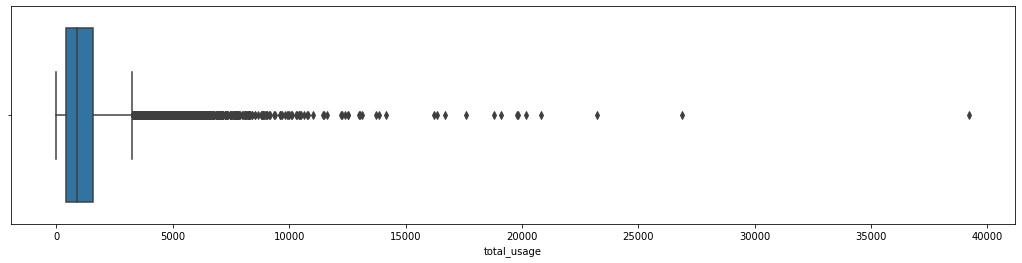

In [39]:
plt.figure(figsize=(18,4))
sns.boxplot(df_churn_hvc['total_usage'])
plt.show()

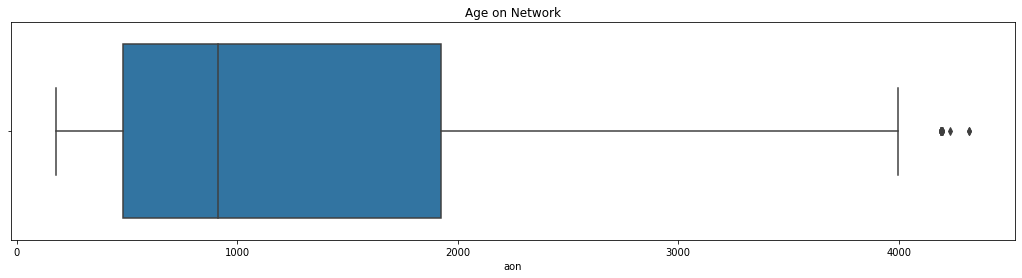

In [40]:
plt.figure(figsize=(18,4))
sns.boxplot(df_churn_hvc['aon'])
plt.title('Age on Network')
plt.show()

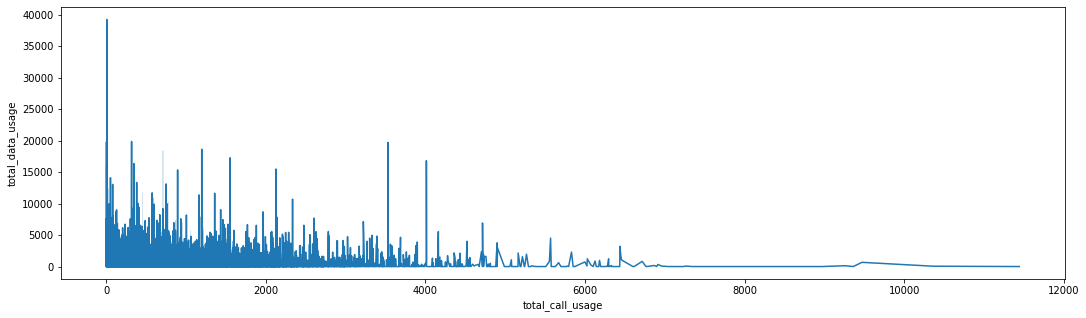

In [41]:
plt.figure(figsize=(18, 5))
sns.lineplot(x='total_call_usage', y='total_data_usage', data=df_churn_hvc)
plt.show()

In [42]:
mobile_df = df_churn_hvc.pop('mobile_number')

## Train Test Split

In [43]:
y = df_churn_hvc.pop('cust_churn')
X = df_churn_hvc

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [45]:
X_train.shape

(20985, 102)

In [46]:
X_test.shape

(8994, 102)

In [47]:
y_train.shape

(20985,)

In [48]:
y_test.shape

(8994,)

## Correlation

In [49]:
corr = X_train.corr()
corr

,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,...,sachet_3g_7,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_6_7,total_call_usage,total_data_usage,total_usage
arpu_6,1.000000,0.540661,0.310749,0.160866,0.478862,0.267503,0.111201,0.073429,0.188939,0.133571,...,0.022136,-0.009291,0.127492,0.127615,0.176032,0.072166,0.808014,0.214410,0.143324,0.250213
arpu_7,0.540661,1.000000,0.177304,0.333228,0.300345,0.493274,0.083819,0.117082,0.139059,0.209905,...,0.071310,-0.015029,0.173082,0.201745,0.135582,0.090889,0.858383,0.339051,0.202572,0.377116
onnet_mou_6,0.310749,0.177304,1.000000,0.726925,0.012142,-0.046670,0.007301,0.014393,0.059343,0.061317,...,-0.034470,-0.092032,-0.082846,-0.090721,-0.085751,-0.037299,0.296736,0.239600,-0.091491,0.085656
onnet_mou_7,0.160866,0.333228,0.726925,1.000000,-0.028641,0.006644,0.023726,-0.001902,0.066861,0.059440,...,-0.026448,-0.096508,-0.080815,-0.087275,-0.094034,-0.035478,0.298965,0.326819,-0.085647,0.147009
offnet_mou_6,0.478862,0.300345,0.012142,-0.028641,1.000000,0.696903,0.016983,0.029051,0.087941,0.080438,...,-0.047514,-0.051884,-0.065664,-0.071259,-0.062914,-0.012147,0.461958,0.295438,-0.071816,0.137215
offnet_mou_7,0.267503,0.493274,-0.046670,0.006644,0.696903,1.000000,0.031039,0.021787,0.080072,0.085283,...,-0.044730,-0.062518,-0.066579,-0.072935,-0.075818,-0.015452,0.450060,0.380157,-0.067117,0.196055
roam_ic_mou_6,0.111201,0.083819,0.007301,0.023726,0.016983,0.031039,1.000000,0.426916,0.638747,0.333351,...,-0.012444,0.022875,0.018797,0.012234,0.022600,0.009096,0.117806,0.043565,0.003728,0.031269
roam_ic_mou_7,0.073429,0.117082,0.014393,-0.001902,0.029051,0.021787,0.426916,1.000000,0.333006,0.652659,...,-0.010941,-0.003709,0.024113,0.019928,0.030685,0.022725,0.115191,0.013873,0.010866,0.017417
roam_og_mou_6,0.188939,0.139059,0.059343,0.066861,0.087941,0.080072,0.638747,0.333006,1.000000,0.519131,...,-0.016059,-0.003220,-0.001279,-0.008578,0.001475,0.001811,0.206853,0.044341,-0.007945,0.022778
roam_og_mou_7,0.133571,0.209905,0.061317,0.059440,0.080438,0.085283,0.333351,0.652659,0.519131,1.000000,...,-0.014315,-0.020319,0.003999,-0.000824,0.009948,0.014195,0.217353,0.015304,0.003909,0.012988


In [50]:
#plt.figure(figsize=(200,100))
#sns.heatmap(corr, annot=True)
#plt.show()

In [51]:
threshold = 0.8
corr_matrix = corr
iters = range(len(corr_matrix.columns) - 1)
col1_list = []
col2_list = []
val_list = []

# Iterate through the correlation matrix and compare correlations
for i in iters:
    for j in range(i+1):
        item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
        col = item.columns
        row = item.index
        val = abs(item.values)
        
        # If correlation exceeds the threshold
        if val[0][0] >= threshold:
            col1 = col.values[0]
            col2 = row.values[0]
            if ((col2 not in col1_list) or (col1 not in col2_list)):
                col1_list.append(col1)
                col2_list.append(col2)
                val_list.append(val[0][0])

pd.DataFrame({'col1': col1_list, 'col2': col2_list, 'val': val_list})

,col1,col2,val
0,std_og_t2t_mou_6,onnet_mou_6,0.847959
1,std_og_t2t_mou_7,onnet_mou_7,0.853277
2,std_og_t2m_mou_6,offnet_mou_6,0.825924
3,std_og_t2m_mou_7,offnet_mou_7,0.849289
4,total_og_mou_6,std_og_mou_6,0.818499
5,total_og_mou_7,std_og_mou_7,0.837721
6,loc_ic_mou_6,loc_ic_t2m_mou_6,0.847856
7,loc_ic_mou_7,loc_ic_t2m_mou_7,0.830215
8,loc_ic_mou_7,loc_ic_mou_6,0.810313
9,std_ic_mou_6,std_ic_t2m_mou_6,0.842907


### Feature Scaling

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = X_train.columns
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=columns)
X_train.head()

,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,...,sachet_3g_7,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_6_7,total_call_usage,total_data_usage,total_usage
0,0.193794,0.269377,-0.290499,-0.320259,0.537934,0.875792,-0.226254,-0.20692,-0.244607,-0.223138,...,-0.156336,0.887749,-0.036233,0.085971,-0.317221,-0.15326,0.069094,0.315234,-0.067553,0.153404
1,-0.493517,-0.489996,-0.515091,-0.390316,-0.197501,-0.388941,-0.226254,-0.20692,-0.244607,-0.223138,...,0.913695,-0.998614,-0.326818,-0.331929,-0.317221,-0.15326,-0.693728,-0.238099,-0.349486,-0.424545
2,-0.379638,-0.020756,-0.573413,-0.607373,-0.680955,-0.671479,-0.226254,-0.20692,-0.244607,-0.223138,...,-0.156336,0.881588,-0.326818,-0.331929,-0.317221,-0.15326,-0.401121,-0.682034,0.283377,-0.226143
3,0.060972,-0.636170,0.869262,-0.053817,-0.172045,-0.340572,-0.226254,-0.03237,-0.244607,0.169382,...,-0.156336,-0.081618,-0.326818,-0.331929,-0.317221,-0.15326,-0.309123,-0.269888,-0.349486,-0.445265
4,-0.447112,-0.772196,-0.303153,-0.529991,-0.361316,-0.427554,-0.226254,-0.20692,-0.244607,-0.223138,...,-0.156336,-0.417405,-0.326818,-0.331929,-0.317221,-0.15326,-0.746116,0.110964,-0.349486,-0.197028


In [53]:
pd.DataFrame(X_train).head()

,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,...,sachet_3g_7,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_6_7,total_call_usage,total_data_usage,total_usage
0,0.193794,0.269377,-0.290499,-0.320259,0.537934,0.875792,-0.226254,-0.20692,-0.244607,-0.223138,...,-0.156336,0.887749,-0.036233,0.085971,-0.317221,-0.15326,0.069094,0.315234,-0.067553,0.153404
1,-0.493517,-0.489996,-0.515091,-0.390316,-0.197501,-0.388941,-0.226254,-0.20692,-0.244607,-0.223138,...,0.913695,-0.998614,-0.326818,-0.331929,-0.317221,-0.15326,-0.693728,-0.238099,-0.349486,-0.424545
2,-0.379638,-0.020756,-0.573413,-0.607373,-0.680955,-0.671479,-0.226254,-0.20692,-0.244607,-0.223138,...,-0.156336,0.881588,-0.326818,-0.331929,-0.317221,-0.15326,-0.401121,-0.682034,0.283377,-0.226143
3,0.060972,-0.636170,0.869262,-0.053817,-0.172045,-0.340572,-0.226254,-0.03237,-0.244607,0.169382,...,-0.156336,-0.081618,-0.326818,-0.331929,-0.317221,-0.15326,-0.309123,-0.269888,-0.349486,-0.445265
4,-0.447112,-0.772196,-0.303153,-0.529991,-0.361316,-0.427554,-0.226254,-0.20692,-0.244607,-0.223138,...,-0.156336,-0.417405,-0.326818,-0.331929,-0.317221,-0.15326,-0.746116,0.110964,-0.349486,-0.197028


In [54]:
X_test = pd.DataFrame(scaler.transform(X_test), columns=columns)
X_test.head()

,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,...,sachet_3g_7,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_6_7,total_call_usage,total_data_usage,total_usage
0,0.821138,2.618213,-0.405377,-0.378983,0.870322,2.206561,-0.226254,-0.20692,-0.244607,-0.223138,...,-0.156336,1.352922,-0.326818,-0.331929,-0.317221,-0.15326,2.394615,2.249362,0.180658,1.605355
1,-0.308035,-0.751047,-0.206955,-0.345927,-0.252536,-0.424710,-0.226254,-0.20692,-0.244607,-0.223138,...,-0.156336,1.146521,-0.326818,-0.331929,-0.317221,-0.15326,-0.711617,-1.010279,-0.349486,-0.927847
2,-0.315165,-0.314813,-0.368900,-0.436175,-0.703514,-0.694148,-0.226121,-0.20692,-0.242050,-0.223138,...,-0.156336,-0.253106,0.465216,-0.331929,0.889543,-0.15326,-0.356400,-0.474308,-0.349486,-0.578504
3,-0.536465,-1.098116,-0.520450,-0.598034,-0.428191,-0.607809,-0.226254,-0.20692,-0.244607,-0.223138,...,-0.156336,-0.774756,-0.326818,-0.331929,-0.317221,-0.15326,-0.642618,-0.631136,-0.349486,-0.680724
4,-0.583254,-0.571512,0.067178,-0.108847,-0.334824,0.043895,-0.226254,-0.20692,-0.244607,-0.223138,...,-0.156336,-0.674123,-0.326818,-0.331929,-0.317221,-0.15326,-0.715450,-0.900422,-0.349486,-0.856243


# Modelling

## Intrepretable Model - Logistic Regression

In [55]:
df_churn_hvc.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 102 columns):
arpu_6                float64
arpu_7                float64
onnet_mou_6           float64
onnet_mou_7           float64
offnet_mou_6          float64
offnet_mou_7          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
loc_og_t2t_mou_6      float64
loc_og_t2t_mou_7      float64
loc_og_t2m_mou_6      float64
loc_og_t2m_mou_7      float64
loc_og_t2f_mou_6      float64
loc_og_t2f_mou_7      float64
loc_og_t2c_mou_6      float64
loc_og_t2c_mou_7      float64
loc_og_mou_6          float64
loc_og_mou_7          float64
std_og_t2t_mou_6      float64
std_og_t2t_mou_7      float64
std_og_t2m_mou_6      float64
std_og_t2m_mou_7      float64
std_og_t2f_mou_6      float64
std_og_t2f_mou_7      float64
std_og_mou_6          float64
std_og_mou_7          float64
isd_og_mou_6          float64
isd_og_mou_7        

In [56]:
df_churn_hvc.select_dtypes(['object', 'category']).columns

Index([], dtype='object')

**No categorical column is there so One Hot Encoding is not required**

In [57]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42)

### RFE

In [58]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 12)
rfe.fit(X_train, y_train)

C:\Users\manvinder.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\manvinder.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\manvinder.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\manvinder.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\manvinder.singh\AppData\Local\C

C:\Users\manvinder.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\manvinder.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\manvinder.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\manvinder.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\manvinder.singh\AppData\Local\C

C:\Users\manvinder.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\manvinder.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\manvinder.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\manvinder.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\manvinder.singh\AppData\Local\C

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=42, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=12, step=1, verbose=0)

In [59]:
cols = X_train.columns[rfe.support_]
cols

Index(['onnet_mou_7', 'offnet_mou_7', 'loc_og_mou_6', 'std_og_mou_6',
       'total_og_mou_6', 'total_og_mou_7', 'count_rech_2g_7', 'sachet_2g_7',
       'sep_vbc_3g', 'total_call_usage', 'total_data_usage', 'total_usage'],
      dtype='object')

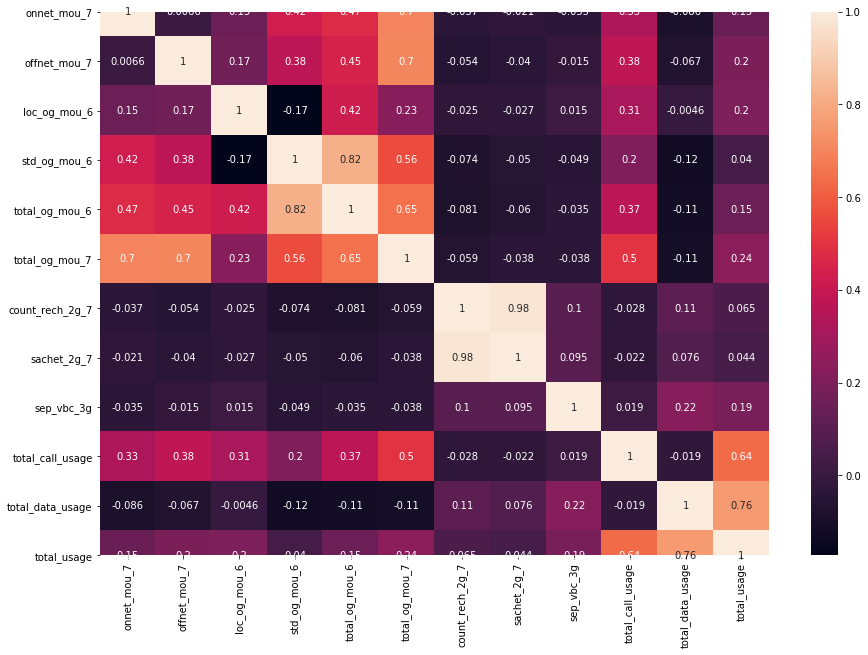

In [60]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train.loc[:,cols].corr(), annot=True)
plt.show()

In [61]:
## Drop corerelated columns
cols_to_drop = ['count_rech_2g_7', 'std_og_mou_6']
X_train.drop(cols_to_drop, axis=1, inplace=True)
X_test.drop(cols_to_drop, axis=1, inplace=True)

In [114]:
logreg = LogisticRegression(class_weight={0:0.4, 1:0.6}, random_state=42)
model = logreg.fit(X_train, y_train)

C:\Users\manvinder.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [115]:
y_train_pred_prob = model.predict_proba(X_train)
y_train_pred_prob

array([[9.99999989e-01, 1.10073355e-08],
       [9.99889726e-01, 1.10273781e-04],
       [9.99448290e-01, 5.51709920e-04],
       ...,
       [9.99998662e-01, 1.33785859e-06],
       [1.00000000e+00, 5.76752875e-12],
       [9.99999380e-01, 6.20434048e-07]])

In [116]:
model.classes_

array([0, 1], dtype=int64)

In [117]:
y_train_pred_prob = pd.Series(y_train_pred_prob[:,1])

In [118]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
#print(accuracy_score(y_test, y_pred))

In [119]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

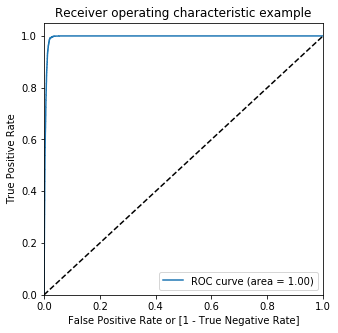

In [120]:
draw_roc(y_train, y_train_pred_prob)

### Finding Optimal Cutoff Point

In [121]:
# Let's create columns with different probability cutoffs 
pred_prob_df = pd.DataFrame()
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    pred_prob_df[i]= y_train_pred_prob.map(lambda x: 1 if x > i else 0)
pred_prob_df.head()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [122]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train, pred_prob_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.085871  1.000000  0.000000
0.1   0.1  0.928377  1.000000  0.921649
0.2   0.2  0.946724  1.000000  0.941719
0.3   0.3  0.957684  0.999445  0.953761
0.4   0.4  0.967262  0.998890  0.964291
0.5   0.5  0.974601  0.995560  0.972632
0.6   0.6  0.981844  0.975028  0.982484
0.7   0.7  0.977317  0.826304  0.991503
0.8   0.8  0.942149  0.346837  0.998071
0.9   0.9  0.919371  0.063263  0.999791


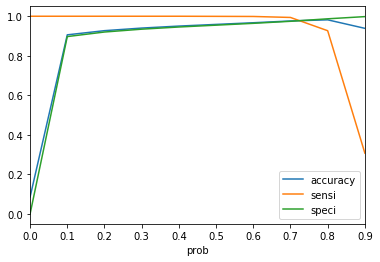

In [71]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [72]:
cutoff = 0.7
y_train_pred = y_train_pred_prob.map( lambda x: 1 if x > cutoff else 0)
y_train_pred

0        0
1        0
2        0
3        0
4        0
        ..
20980    0
20981    0
20982    0
20983    0
20984    0
Length: 20985, dtype: int64

In [73]:
accuracy_score(y_train, y_train_pred)

0.9761258041458184

In [74]:
confusion2 = confusion_matrix(y_train, y_train_pred)
confusion2

array([[18693,   490],
       [   11,  1791]], dtype=int64)

In [75]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [76]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9938956714761377

In [77]:
# Let us calculate specificity
TN / float(TN+FP)

0.9744565500703748

In [78]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.02554344992962519


In [79]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7851819377466024


In [80]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9994118905047049


### Precision and Recall

In [81]:
confusion = confusion_matrix(y_train, y_train_pred)
confusion

array([[18693,   490],
       [   11,  1791]], dtype=int64)

#### Precision

In [82]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7851819377466024

#### Recall

In [83]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9938956714761377

#### Precision and recall tradeoff


In [84]:
from sklearn.metrics import precision_recall_curve

In [85]:
p, r, thresholds = precision_recall_curve(y_train, y_train_pred)

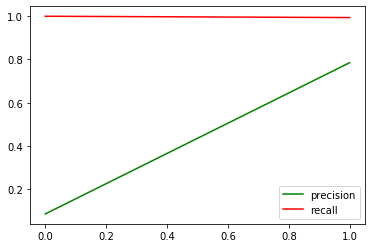

In [86]:
plt.plot(thresholds, p[:-1], "g-", label='precision')
plt.plot(thresholds, r[:-1], "r-", label='recall')
plt.legend()
plt.show()

In [87]:
y.value_counts()

0    27390
1     2589
Name: cust_churn, dtype: int64

### Making predictions on the test set

In [93]:
y_test_pred_prob = model.predict_proba(X_test)
y_test_pred_prob

array([[1.00000000e+00, 7.59618229e-19],
       [2.25648227e-01, 7.74351773e-01],
       [9.97247490e-01, 2.75251002e-03],
       ...,
       [9.99960313e-01, 3.96865931e-05],
       [9.98845743e-01, 1.15425689e-03],
       [9.99884634e-01, 1.15366289e-04]])

In [94]:
y_test_pred_prob = pd.Series(y_test_pred_prob[:,1])

In [95]:
y_test_pred = y_test_pred_prob.map(lambda x: 1 if x > cutoff else 0)

In [97]:
accuracy_score(y_test, y_test_pred)

0.9739826551034023

In [99]:
confusion2 = confusion_matrix(y_test, y_test_pred)
confusion2

array([[7981,  226],
       [   8,  779]], dtype=int64)

In [100]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [101]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9898348157560356

In [102]:
# Let us calculate specificity
TN / float(TN+FP)

0.972462531984891

In [103]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.027537468015109052


In [104]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7751243781094528


In [105]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9989986231067718


### Precision and Recall

In [109]:
confusion = confusion_matrix(y_test, y_test_pred)
confusion

array([[7981,  226],
       [   8,  779]], dtype=int64)

#### Precision

In [110]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7751243781094528

#### Recall

In [111]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9898348157560356

#### Sensitivity